# Topics: K - Means, LDA, Logit, NMDS

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Data Files


In [2]:
df = pd.read_csv('admission2_mod.csv')
out_of_sample = pd.read_csv('hold_out_sample.csv')

In [3]:
# converting the admit status into boolean
df['De']=df['De']=='admit'


In [4]:
df.head(5)

,GPA,GMAT,De
0,2.13,408,False
1,2.19,411,False
2,2.20,474,False
3,2.31,505,False
4,2.35,321,False


In [5]:
out_of_sample.head(5)

,GPA,GMAT,admit
0,2.96,596,True
1,3.14,473,False
2,3.22,482,True
3,3.29,527,True
4,3.69,505,True


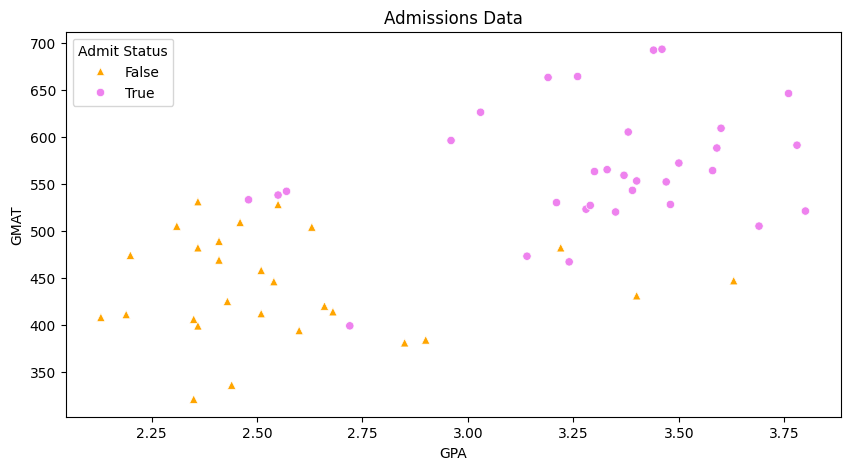

In [6]:
# plot for admissions data
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='De', style='De', markers=['^', 'o'], palette=['orange', 'violet'])
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Admissions Data")
plt.legend(title='Admit Status')
plt.show()

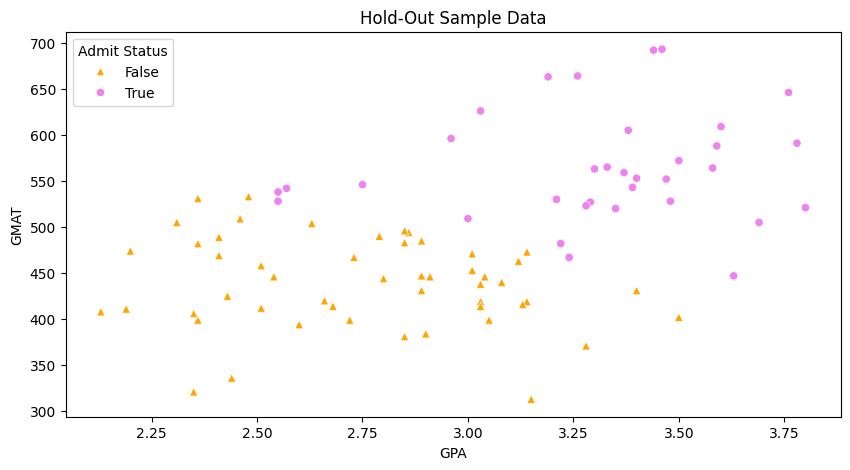

In [7]:
# plot hold out sample data

plt.figure(figsize=(10, 5))
sns.scatterplot(data=out_of_sample, x='GPA', y='GMAT', hue='admit', style='admit', markers=['^', 'o'], palette=['orange', 'violet'])
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Hold-Out Sample Data")
plt.legend(title='Admit Status')
plt.show()

# K-Means Clustering

* K-means clustering is a popular algorithm (*unsupervised learning*) used to partition a dataset into 
**K** distinct, non-overlapping subsets or clusters. 
* The goal is to group data points in such a way that points in the same cluster are more similar to each other than to those in other clusters.

## K - Means Without Scaling

### K-Means: 2 Clusters

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(df[['GPA', 'GMAT']])
df['Cluster'] = kmeans2.labels_


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


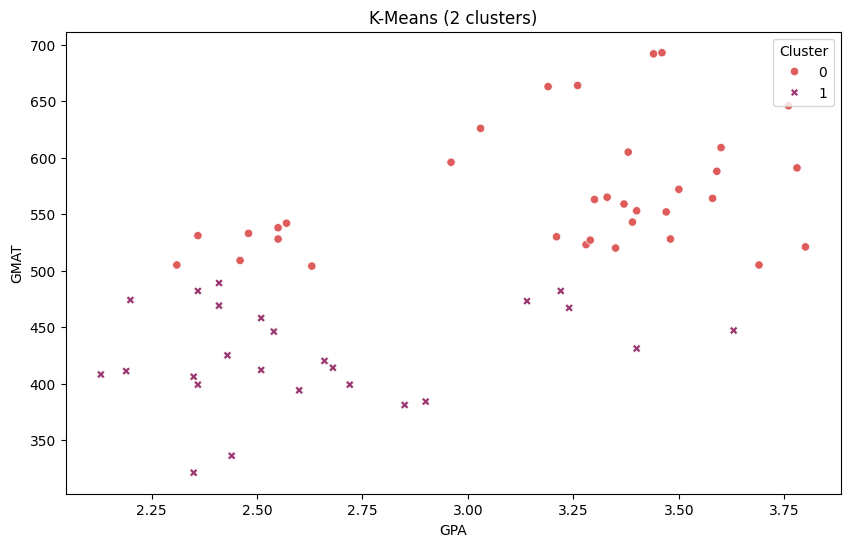

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='flare')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means (2 clusters)')
plt.legend(title='Cluster')
plt.show()

### K-Means: 3 Clusters


In [11]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(df[['GPA', 'GMAT']])
df['Cluster'] = kmeans3.labels_


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


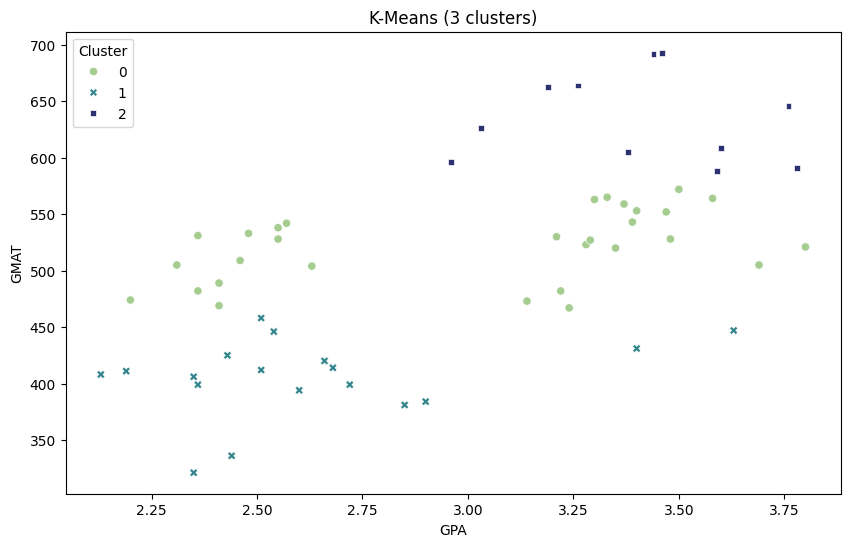

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='crest')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means (3 clusters)')
plt.legend(title='Cluster')
plt.show()

## K - Means With Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# creating another dataframe with same values as dataframe inorder to preserve the original dataframe
df_norm = df.copy()

In [15]:
# Scaling the data in df_norm
scaler = StandardScaler()
df_norm[['GPA', 'GMAT']] = scaler.fit_transform(df_norm[['GPA', 'GMAT']])

### K - Means with 2 clusters

In [16]:
# Creating a K-means model with 2 clusters on scaled data

kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(df_norm[['GPA', 'GMAT']])
df['Cluster'] = kmeans_2.labels_

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


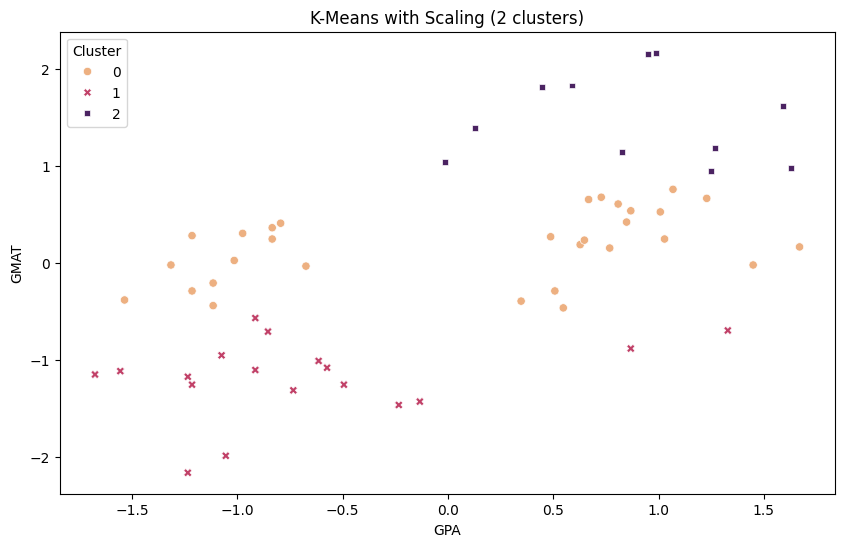

In [17]:
# plot to visulaise the K-means with 3 clusers on scaled data

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_norm, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='flare')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means with Scaling (2 clusters)')
plt.legend(title='Cluster')
plt.show()

### K - Means with 3 Clusters

In [18]:
# Creating a K-means model with 3 clusters on scaled data
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(df_norm[['GPA', 'GMAT']])
df['Cluster'] = kmeans_3.labels_

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


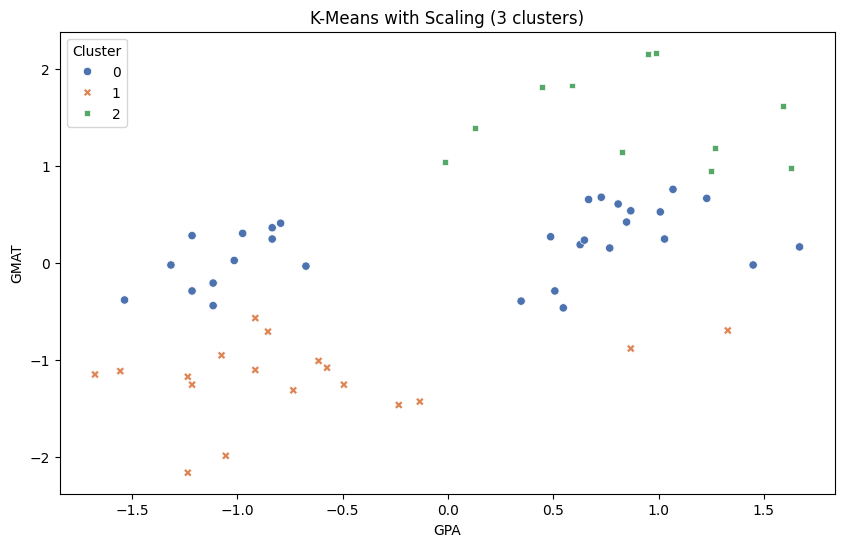

In [19]:
# plot to visulaise the K-means with 3 clusers on scaled data

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_norm, x='GPA', y='GMAT', hue='Cluster', style='Cluster', palette='deep')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('K-Means with Scaling (3 clusters)')
plt.legend(title='Cluster')
plt.show()

# Linear Discriminant Analysis (LDA) 

LDA is a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that best separates two or more classes of objects or events.

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #library to perform LDA
from sklearn.metrics import confusion_matrix # library for confusion matrix

In [21]:
# Split the data frame into Features i.e X and Target i.e y
X = df[['GMAT','GPA']]
y = df['De']

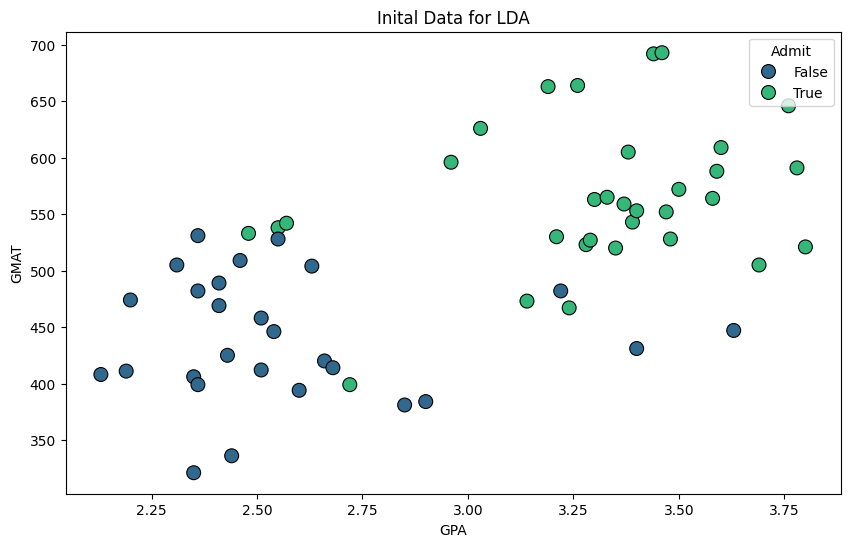

In [46]:
# Plot the initial data
#plt.scatter(df['GPA'], df['GMAT'], c=df['De'], cmap='viridis', marker='o')
plt.figure(figsize=(10,6))
sns.scatterplot(x='GPA', y='GMAT', hue='De', palette='viridis', data=df, marker='o',s=100,edgecolor='k')
plt.legend(title='Admit')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('Inital Data for LDA')
plt.show()

In [23]:
# Normalized Feature (if you want to normalize the features i.e X then uncomment the below code)
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(X)

In [24]:
# To estimate LDA
lda = LDA()
#lda.fit(X_normalized, y)  # Normalized
lda.fit(X, y)  # Not normalized

print(f"Co-efficients of LDA: {lda.coef_}")

Co-efficients of LDA: [[0.02943332 5.17081923]]


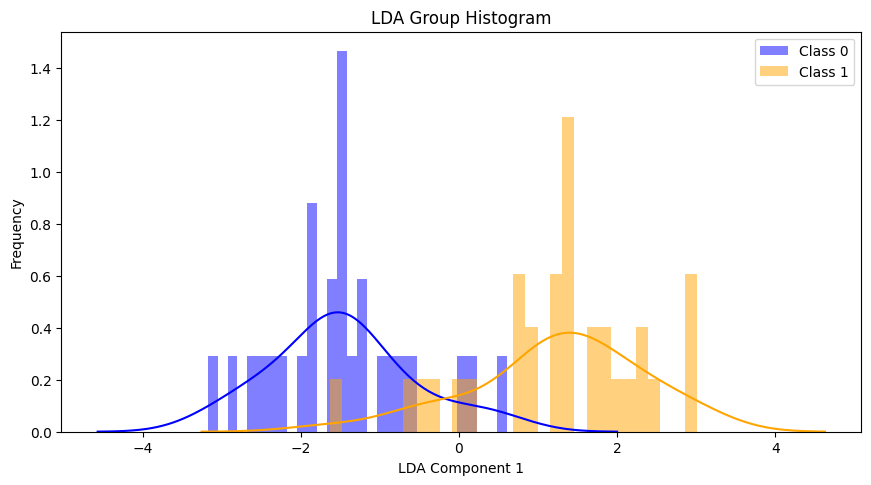

In [25]:
# Plot group histogram
lda_transformed = lda.transform(X) # Transforming the features(X i.e GPa and GMAT) into LDA space
#lda_transformed = lda.transform(X_normalized)

#plotting histogram
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.hist(lda_transformed[y == 0],bins=30, alpha=0.5, label='Class 0', color='blue', density=True)
plt.hist(lda_transformed[y == 1],bins=30, alpha=0.5, label='Class 1', color='orange', density=True)
sns.kdeplot(lda_transformed[y == 0].flatten(), color='blue')
sns.kdeplot(lda_transformed[y == 1].flatten(), color='orange')
plt.legend()
plt.title('LDA Group Histogram')
plt.xlabel('LDA Component 1')
plt.ylabel('Frequency')
plt.show()


In [26]:
# In-sample prediction
y_pred = lda.predict(X)
#y_pred = lda.predict(X_normalized)


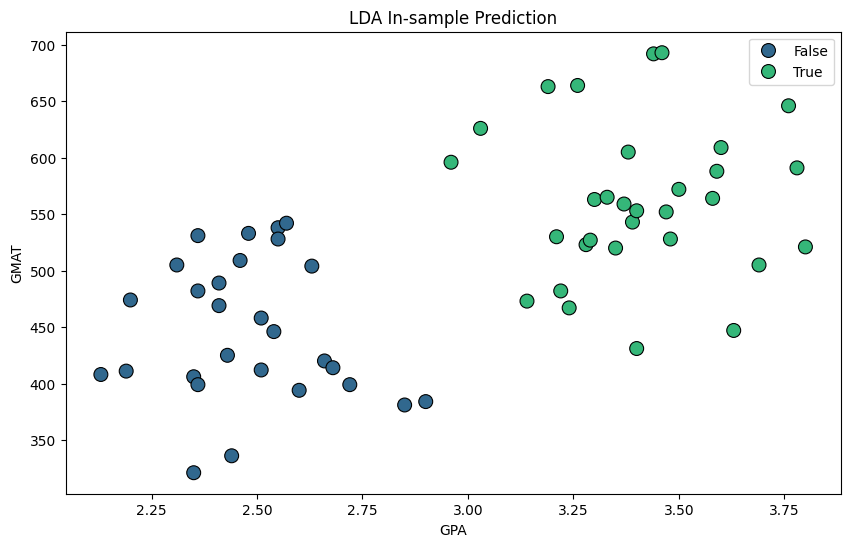

In [27]:
# Plotting the in-sample prediction
plt.figure(figsize=(10,6))
sns.scatterplot(x='GPA', y='GMAT', hue=y_pred, palette='viridis', data=df, s=100, edgecolor='k')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('LDA In-sample Prediction')
plt.show()

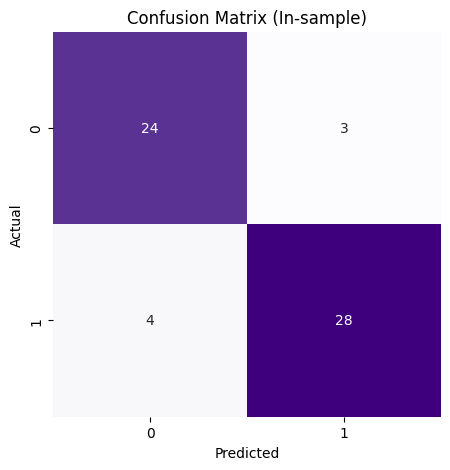

In [28]:
# Confusion matrix for in-sample prediction
cm = confusion_matrix(y, y_pred)

# Visualizing the confusion matrix for in-sample prediction
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix (In-sample)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [29]:
# Using out-of-sample as our test set
X_test = out_of_sample[['GMAT', 'GPA']]
y_test = out_of_sample['admit']

In [30]:
# Normalize test features if normalization was used (uncommen this to use)
#X_test_normalized = scaler.transform(X_test)

In [31]:
# LDA prediction on test set (choose one)
#y_test_pred = lda.predict(X_test_normalized)  # Normalized (uncomment this code to use)
y_test_pred = lda.predict(X_test)  # Not normalized

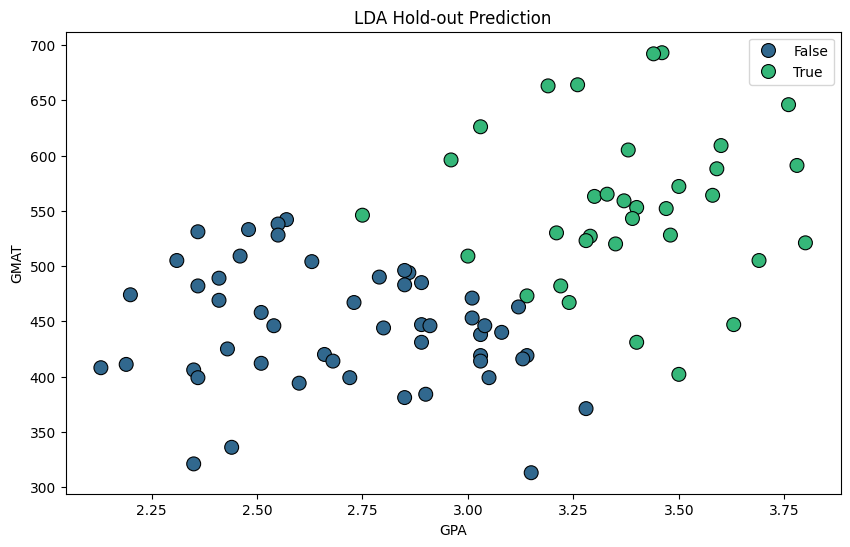

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GPA', y='GMAT', hue=y_test_pred, palette='viridis', data=out_of_sample, s=100, edgecolor='k')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.title('LDA Hold-out Prediction')
plt.show()

[[48  3]
 [ 3 31]]


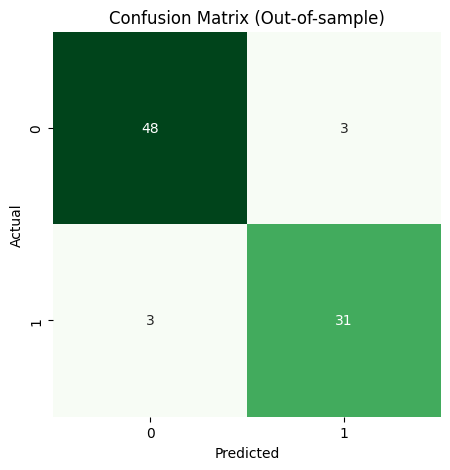

In [33]:
# Confusion Matrix for Out-of-Sample
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test) #you can uncomment this to see the actual values

# Visualization of confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix (Out-of-sample)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()